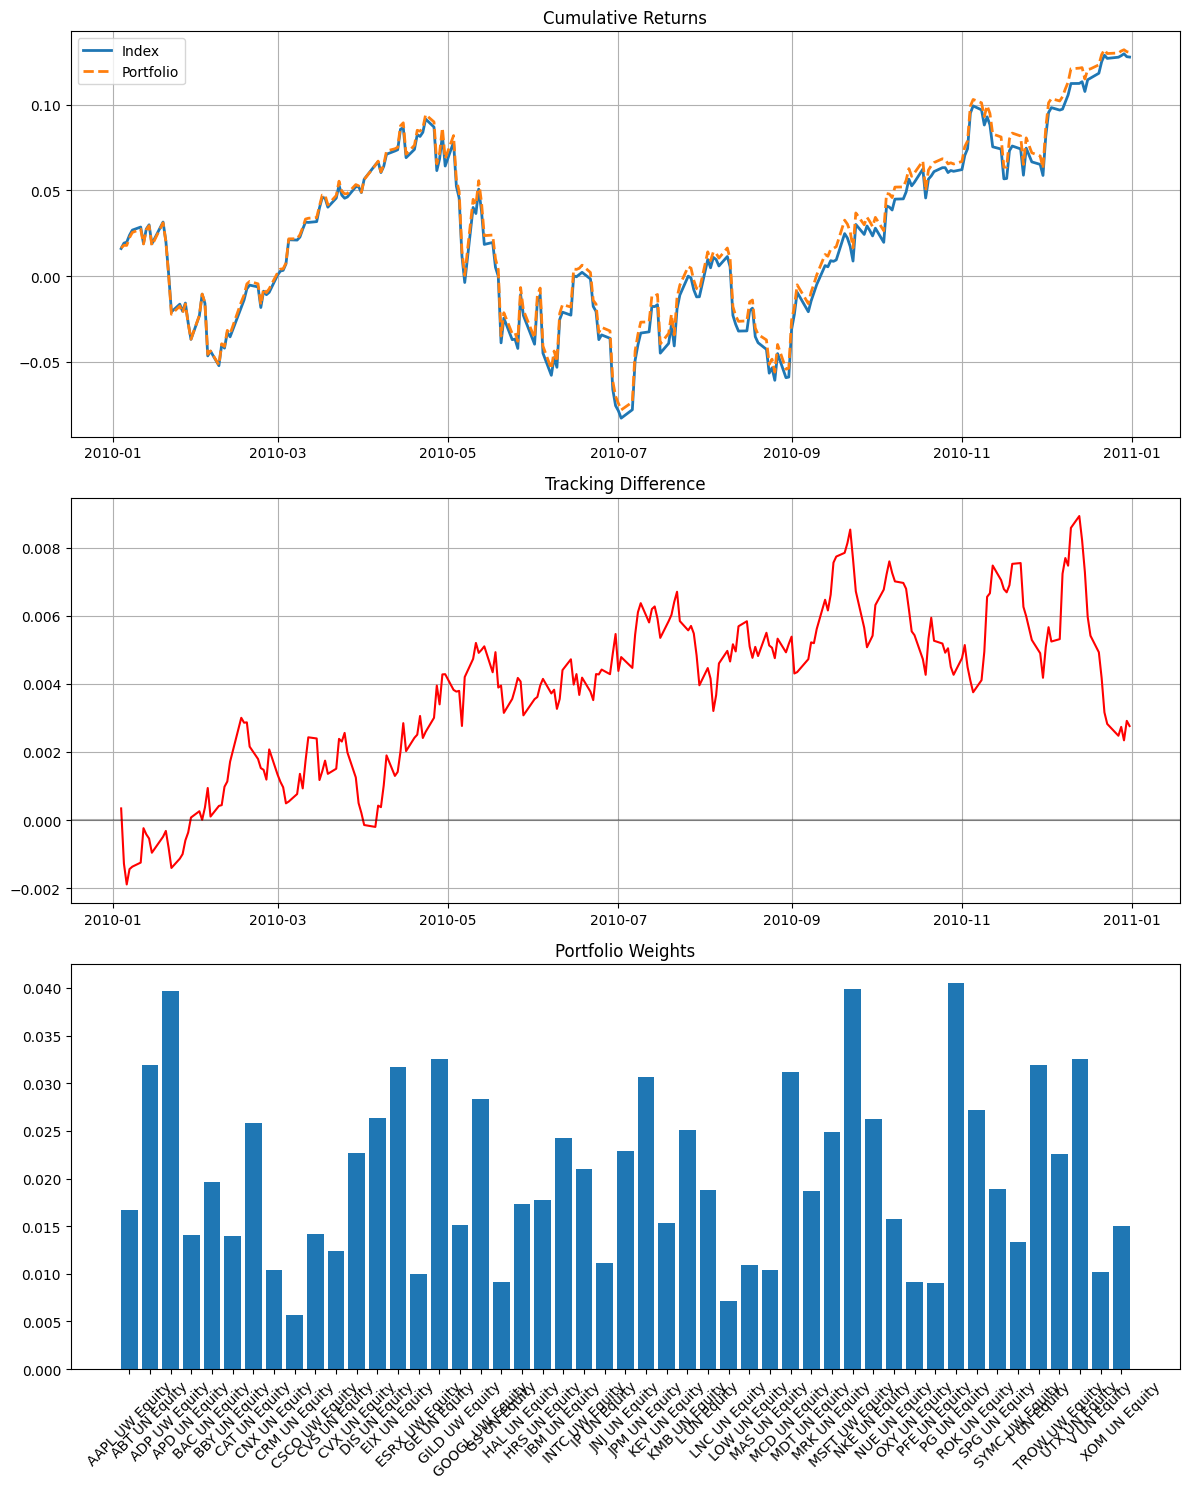

In [1]:
import polars as pl
from replicate.data.paths import INDEX_2010_X_PATH, INDEX_2010_SP500_PATH
from replicate.data.loading import load
from replicate.data.align import align

from replicate.optimizers.mm import MMOptimizer
from replicate.evaluation.metrics import TrackingMetrics
from replicate.evaluation.visualizer import TrackingVisualizer

optimizer = MMOptimizer(measure='ete')

# Load data
constituents, _ = load(INDEX_2010_X_PATH)
target, _ = load(INDEX_2010_SP500_PATH)
constituents, target = align(constituents, target, on='Date')

X = constituents.drop('Date').collect().to_numpy()
r = target.drop('Date').collect().to_numpy().flatten() # we expect 1d array
dates = target.select('Date').collect().to_numpy().flatten()
asset_names = [c for c in constituents.collect_schema().names() if c != 'Date']

# Optimize weights
result_dict = optimizer.optimize(X, r, lambda_=1e-7, u=0.5)
weights = result_dict['weights']

# Calculate metrics
metrics = TrackingMetrics.calculate_metrics(
    X @ weights,
    r,
    weights
)

# Visualize results
TrackingVisualizer.plot_tracking_analysis(
    dates,
    X @ weights,
    r,
    weights,
    asset_names
)

In [1]:
from replicate.optimizers.kkt import project_weights_kkt, demonstrate_kkt_projection

demonstrate_kkt_projection()

Case 1 (no upper bound hits):
Input c: [0.1 0.2 0.3 0.4]
Weights: [0.325 0.275 0.225 0.175]
Sum of weights: 1.0

Case 2 (with upper bound hits):
Input c: [-0.5 -0.4  0.1  0.2]
Weights: [0.4        0.38333333 0.13333333 0.08333333]
Sum of weights: 1.0
Max weight: 0.4
Case 3 (too small u):
Input c: [0.1 0.2 0.3]
Weights: [0.1 0.1 0.1]
Sum of weights: 0.30000000000000004
Case 4 (large values):
Input c: [  100000.  1000000. 10000000.]
Weights: [0.5 0.5 0. ]
Sum of weights: 1.0


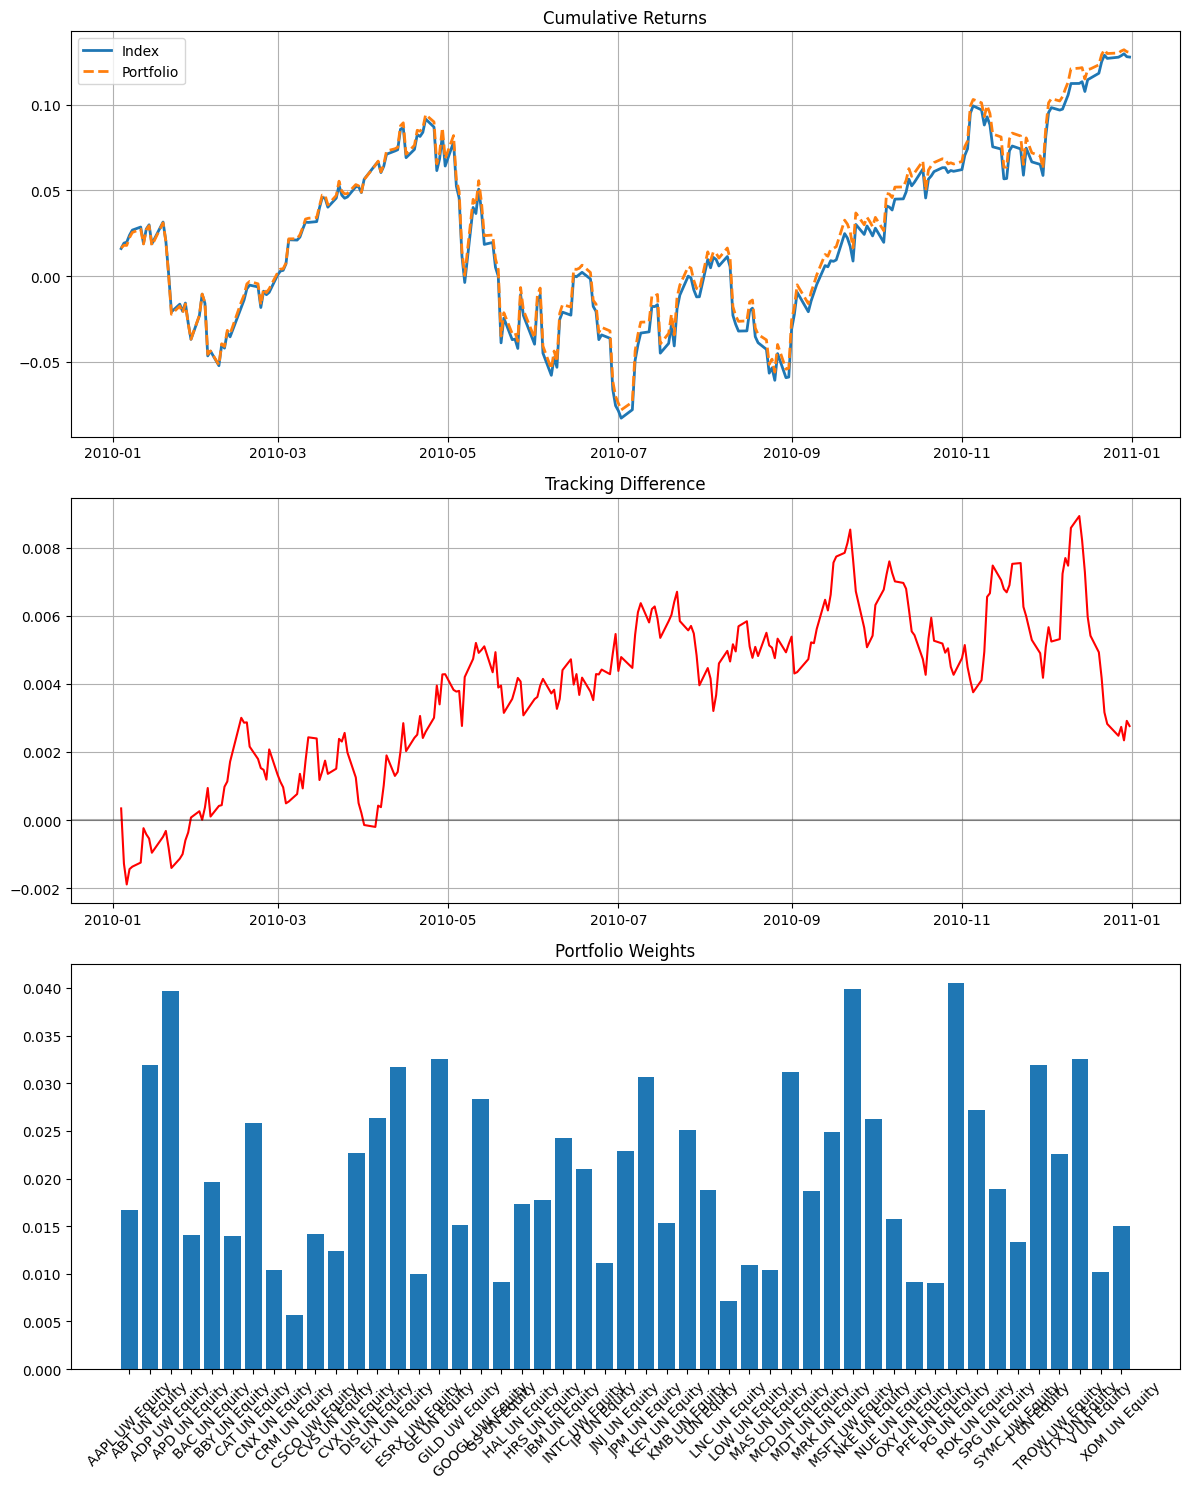

In [ ]:
import polars as pl
from replicate.data.paths import INDEX_2010_X_PATH, INDEX_2010_SP500_PATH
from replicate.data.loading import load
from replicate.data.align import align

from replicate.optimizers.mm import MMOptimizer
from replicate.evaluation.metrics import TrackingMetrics
from replicate.evaluation.visualizer import TrackingVisualizer

optimizer = MMOptimizer(measure='ete')

# Load data
constituents, _ = load(INDEX_2010_X_PATH)
target, _ = load(INDEX_2010_SP500_PATH)
constituents, target = align(constituents, target, on='Date')

X = constituents.drop('Date').collect().to_numpy()
r = target.drop('Date').collect().to_numpy().flatten() # we expect 1d array
dates = target.select('Date').collect().to_numpy().flatten()
asset_names = [c for c in constituents.collect_schema().names() if c != 'Date']

# Optimize weights
result_dict = optimizer.optimize(X, r, lambda_=1e-7, u=0.5)
weights = result_dict['weights']

# Calculate metrics
metrics = TrackingMetrics.calculate_metrics(
    X @ weights,
    r,
    weights
)

# Visualize results
TrackingVisualizer.plot_tracking_analysis(
    dates,
    X @ weights,
    r,
    weights,
    asset_names
)